In [5]:
import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X,y=make_moons(n_samples=250, noise=0.05,random_state=42)

In [9]:
X.shape

(250, 2)

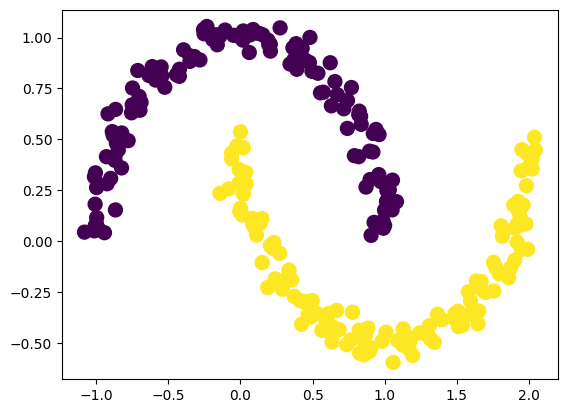

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.show()

In [11]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

model.add(Dense(1,activation='sigmoid'))



In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
old_weight=model.get_weights()[0]

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [15]:
model.fit(X_train,y_train, epochs=100)

Epoch 1/100
7/7 [==============================] - 7s 6ms/step - loss: 0.8062 - accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7480 - accuracy: 0.5100
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7121 - accuracy: 0.5250
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5400
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6668 - accuracy: 0.5500
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6542 - accuracy: 0.5700
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6422 - accuracy: 0.6100
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.7650
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 0.6043 - accuracy: 0.8350
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5832 - accuracy: 0.8400
Epoch 11/100
7/7 [===========

In [18]:
new_weight=model.get_weights()[0]
new_weight

array([[-0.9383912 , -0.7140299 , -1.8865254 ,  0.8672335 ,  1.0691055 ,
        -0.29744753, -1.5926658 ,  1.6629078 , -1.4486613 ,  2.0028229 ],
       [ 1.4543675 ,  0.1892335 ,  0.6683371 , -0.83307636,  1.3627312 ,
         1.2700732 , -1.6786704 , -0.6254047 ,  0.33405322, -1.1346294 ]],
      dtype=float32)

In [17]:
old_weight

array([[-0.7372181 , -0.8977544 , -1.6118532 ,  0.8431539 ,  1.064393  ,
        -0.6061218 , -1.4327666 ,  1.5478035 , -1.1918557 ,  1.921751  ],
       [ 1.4128339 ,  0.05162622,  0.634165  , -0.6729526 ,  1.1776838 ,
         0.96768314, -1.8463658 , -0.33141062,  0.2461628 , -1.0153354 ]],
      dtype=float32)

In [19]:
new_weight

array([[-0.9383912 , -0.7140299 , -1.8865254 ,  0.8672335 ,  1.0691055 ,
        -0.29744753, -1.5926658 ,  1.6629078 , -1.4486613 ,  2.0028229 ],
       [ 1.4543675 ,  0.1892335 ,  0.6683371 , -0.83307636,  1.3627312 ,
         1.2700732 , -1.6786704 , -0.6254047 ,  0.33405322, -1.1346294 ]],
      dtype=float32)

In [20]:
percent_change=abs(100*(old_weight-new_weight)/old_weight)
percent_change

array([[ 27.288145  ,  20.464891  ,  17.040766  ,   2.8558986 ,
          0.44273704,  50.92611   ,  11.160173  ,   7.436623  ,
         21.546707  ,   4.218645  ],
       [  2.9397361 , 266.54535   ,   5.3885217 ,  23.794212  ,
         15.712823  ,  31.248869  ,   9.0824585 ,  88.70992   ,
         35.70418   ,  11.749213  ]], dtype=float32)

In [ ]:
# Negligible change in weights dur to vanishing gradient problem

9600/9600 [==============================] - 21s 2ms/step


<Axes: >

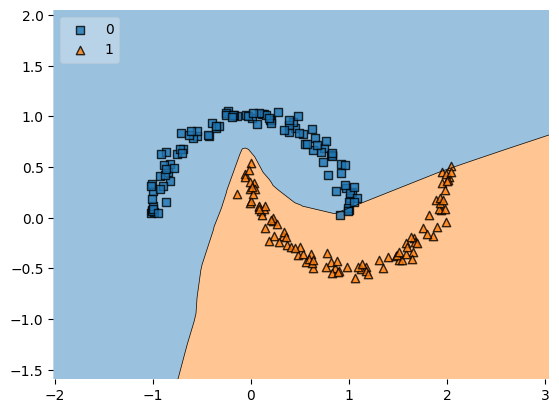

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.astype('int'),clf=model, legend=2)
# No decision boundary due to vanishing gradient problem